# Liver vs Cervical vs Colon Cancer

## 1) Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df4 = pd.read_csv('colon', delimiter='\t')

In [2]:
# df.copy()
df4.head()
#df.iloc[:,0]
# df["sample	Chrom	Start	End	value"]

,sample,TCGA-CA-5256-01,TCGA-AZ-6599-01,TCGA-AA-3655-01,TCGA-A6-6137-01,TCGA-CK-4952-01,TCGA-A6-5657-01,TCGA-AD-6963-01,TCGA-AA-3663-11,TCGA-A6-6138-01,...,TCGA-F4-6570-01,TCGA-G4-6317-01,TCGA-SS-A7HO-01,TCGA-4T-AA8H-01,TCGA-CM-6162-01,TCGA-AA-3489-11,TCGA-DM-A1D4-01,TCGA-QG-A5YV-01,TCGA-CA-5796-01,TCGA-G4-6626-01
0,ARHGEF10L,0.297608,1.257208,1.160508,1.193608,0.702008,0.554908,0.999508,1.190308,0.507608,...,0.700808,0.846408,2.067408,1.385708,0.829308,0.563208,0.680008,1.386608,0.763408,1.240208
1,HIF3A,-1.837526,-3.211026,-3.468926,0.521174,-3.604126,-0.077026,-1.091326,2.894474,-3.660426,...,-2.716926,-0.145126,3.349874,-2.265826,-1.738426,1.567574,-3.099426,-1.594726,-4.366926,-1.523426
2,RNF17,-0.531035,-0.531035,0.018465,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,0.396865,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
3,RNF10,-1.291872,-0.089772,-0.271372,-0.072272,0.090828,-0.291472,-0.337872,0.146228,-0.019572,...,-0.313572,-0.598372,-0.786172,0.130428,-0.259072,-0.147072,-0.052972,-0.186672,-0.243672,-0.495872
4,RNF11,-0.452178,-0.584878,-1.034478,-0.723578,-1.114178,-0.790178,-1.657478,0.110122,-0.556378,...,-0.715278,-1.532378,-1.199378,-1.120078,0.061922,0.577922,-1.988078,-1.304978,-0.185378,-2.215478


In [3]:
df4 = df4.T
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-CA-5256-01,0.297608,-1.83753,-0.531035,-1.29187,-0.452178,0.69019,-1.11739,-1.49465,-0.423399,-3.07517,...,-0.748878,-1.58712,-0.399933,-0.66949,-1.19398,-2.41369,-1.70013,1.41991,-1.59333,0.773288
TCGA-AZ-6599-01,1.25721,-3.21103,-0.531035,-0.089772,-0.584878,-0.57371,-0.568894,-1.78095,-0.423399,-1.89037,...,-0.748878,-0.993017,-2.64783,0.0569102,-0.901177,-2.96499,-2.58043,0.469905,-1.37063,0.465088
TCGA-AA-3655-01,1.16051,-3.46893,0.018465,-0.271372,-1.03448,-0.83431,-0.857494,-0.556246,0.523101,-1.94657,...,-0.748878,-1.58712,-0.489533,-0.73189,-0.312477,-1.22129,-0.438427,1.27851,0.506567,0.234688
TCGA-A6-6137-01,1.19361,0.521174,-0.531035,-0.072272,-0.723578,-0.26531,-1.17089,-1.36325,-0.423399,-1.28667,...,-0.748878,2.62528,-0.723933,0.44441,-0.733377,-1.38909,-0.529427,0.103105,0.836067,0.152188


In [4]:
# df =df2
df4.shape

(330, 20530)

In [5]:
# df.dtypes

In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, sample to TCGA-G4-6626-01
Columns: 20530 entries, 0 to 20529
dtypes: object(20530)
memory usage: 51.7+ MB


In [7]:
#Making each column of the dataset have the same number of rows (deleting not a number values and duplicates)

# Alternatively clean = df.dropna()
# df.dropna(inplace=True)
# df.head()
df4 = df4.fillna(0)
# df4 = df4.apply(pd.to_numeric, errors='coerce')
# df4 = df4.apply(lambda x: x.fillna(x.mean()),axis=0)

In [8]:
# Checking dataset properties after having cleaned the original version

df4.shape

(330, 20530)

In [9]:
# Checking for duplicates

# df.duplicated()

In [10]:
new_header = df4.iloc[0] #grab the first row for the header
df4 = df4[1:] #take the data less the header row
df4.columns = new_header #set the header row as the df header
df4.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-CA-5256-01,0.297608,-1.83753,-0.531035,-1.29187,-0.452178,0.69019,-1.11739,-1.49465,-0.423399,-3.07517,...,-0.748878,-1.58712,-0.399933,-0.66949,-1.19398,-2.41369,-1.70013,1.41991,-1.59333,0.773288
TCGA-AZ-6599-01,1.25721,-3.21103,-0.531035,-0.089772,-0.584878,-0.57371,-0.568894,-1.78095,-0.423399,-1.89037,...,-0.748878,-0.993017,-2.64783,0.0569102,-0.901177,-2.96499,-2.58043,0.469905,-1.37063,0.465088
TCGA-AA-3655-01,1.16051,-3.46893,0.018465,-0.271372,-1.03448,-0.83431,-0.857494,-0.556246,0.523101,-1.94657,...,-0.748878,-1.58712,-0.489533,-0.73189,-0.312477,-1.22129,-0.438427,1.27851,0.506567,0.234688
TCGA-A6-6137-01,1.19361,0.521174,-0.531035,-0.072272,-0.723578,-0.26531,-1.17089,-1.36325,-0.423399,-1.28667,...,-0.748878,2.62528,-0.723933,0.44441,-0.733377,-1.38909,-0.529427,0.103105,0.836067,0.152188
TCGA-CK-4952-01,0.702008,-3.60413,-0.531035,0.090828,-1.11418,-0.55471,-1.06229,-1.60245,0.0716006,-0.702472,...,-0.748878,-1.58712,-1.63873,-1.28139,0.235923,-1.45169,-0.734027,-0.569695,-1.88613,-0.190812


In [11]:
# df2 = pd.read_csv('HumanMethylation450cervical', delimiter='\t')
# df2.head()

In [12]:
# df2 = df2.T
# df2.head()
df4.shape

(329, 20530)

In [13]:
# df2.duplicated()
df4['Label'] = np.full(329, 2)

In [14]:
# df2.dropna(inplace=True)
# df2 = df2.fillna(0)

In [15]:
# df2.info()
import pickle
# To then load the variable
with open('data.pickle', 'rb') as f:
    df3 = pickle.load(f)

In [16]:
# df2.shape

In [17]:
# new_header = df2.iloc[0] #grab the first row for the header
# df2 = df2[1:] #take the data less the header row
# df2.columns = new_header #set the header row as the df header
# df2.head()

In [18]:
# liver = np.zeros(429)
# cervical = np.ones(336)

# lab = np.append(liver,cervical)

# # typlab = np.array(typlab)

# print(lab)
# print(lab.shape)

In [19]:
# df3 = pd.merge(df, df2)
# df3.head()

In [20]:
# import pickle
# with open('df.pickle', 'wb') as f:
#     pickle.dump(df, f)
    
# import pickle
# with open('df2.pickle', 'wb') as f:
#     pickle.dump(df2, f)

In [21]:
df4 = df3.append(df4)
df4.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Label
TCGA-NJ-A4YP-01,-0.213692,-2.78003,-0.531035,0.040728,-0.699378,-0.42951,-0.384894,0.702354,-0.423399,2.88833,...,-1.58712,0.931767,-0.46399,-0.00267684,0.745714,1.46177,-0.426195,-0.645033,0.400188,0.0
TCGA-18-3417-01,-2.03299,-0.775126,0.573765,0.365228,0.364522,0.31389,-0.245994,0.0162543,-0.423399,-1.11657,...,-1.58712,0.304967,2.60701,1.30262,1.02501,-0.381027,0.839305,-1.08503,0.533188,0.0
TCGA-22-4613-01,-1.10919,-1.02343,-0.531035,-0.326772,0.308122,1.19219,-0.814294,-0.618246,1.0464,-2.14307,...,-1.58712,0.779667,1.15821,0.124023,-0.396686,-0.781327,-0.732495,1.73387,0.624488,0.0
TCGA-90-7769-01,-1.27039,-3.25483,-0.090835,0.160728,0.368322,-0.52621,0.506406,-1.37095,0.0168006,-3.83017,...,-1.58712,-2.52823,2.07981,-0.431477,0.0947142,-2.26783,-1.13709,-1.21023,0.153688,0.0
TCGA-62-8397-01,0.677108,1.09297,-0.531035,0.583528,0.314922,-0.66211,0.0261055,-1.48875,-0.423399,1.38193,...,-1.58712,0.913367,0.0172102,-0.338677,-0.00518579,-0.735227,0.204105,1.33657,-0.598212,0.0


In [22]:
df4.shape
# df3['Label'] = lab
# df3.head()

(1766, 20531)

In [23]:
# typasd = pd.DataFrame(data=d)
# df3 = pd.merge(df, df2)

export_csv = df4.to_csv ('Cancer3.csv', index = None, header=True)
%store df4

# pickle.dump(df3, r'C:\Users\hp\Desktop\FinalData.pier')
# import pickle
# with open('data3.pickle', 'wb') as f:
#     pickle.dump(df4, f)
    
# To then load the variable
# with open('data.pickle', 'rb') as f:
#     df3 = pickle.load(f)

print(df4.head())

print(df4.shape)

Stored 'df4' (DataFrame)
sample          ARHGEF10L     HIF3A     RNF17     RNF10     RNF11    RNF13  \
TCGA-NJ-A4YP-01 -0.213692  -2.78003 -0.531035  0.040728 -0.699378 -0.42951   
TCGA-18-3417-01  -2.03299 -0.775126  0.573765  0.365228  0.364522  0.31389   
TCGA-22-4613-01  -1.10919  -1.02343 -0.531035 -0.326772  0.308122  1.19219   
TCGA-90-7769-01  -1.27039  -3.25483 -0.090835  0.160728  0.368322 -0.52621   
TCGA-62-8397-01  0.677108   1.09297 -0.531035  0.583528  0.314922 -0.66211   

sample             GTF2IP1       REM1      MTVR2  RTN4RL2  ...     NPY5R  \
TCGA-NJ-A4YP-01  -0.384894   0.702354  -0.423399  2.88833  ...  -1.58712   
TCGA-18-3417-01  -0.245994  0.0162543  -0.423399 -1.11657  ...  -1.58712   
TCGA-22-4613-01  -0.814294  -0.618246     1.0464 -2.14307  ...  -1.58712   
TCGA-90-7769-01   0.506406   -1.37095  0.0168006 -3.83017  ...  -1.58712   
TCGA-62-8397-01  0.0261055   -1.48875  -0.423399  1.38193  ...  -1.58712   

sample              GNGT2      GNGT1       TULP3 

In [28]:
df4.iloc[1200:1800,20530]

TCGA-EK-A3GK-01    1.0
TCGA-PN-A8MA-01    1.0
TCGA-DS-A1O9-01    1.0
TCGA-EX-A69L-01    1.0
TCGA-EX-A1H6-01    1.0
TCGA-MY-A5BE-01    1.0
TCGA-Q1-A73S-01    1.0
TCGA-VS-A9V2-01    1.0
TCGA-Q1-A73Q-01    1.0
TCGA-ZJ-A8QR-01    1.0
TCGA-EA-A5ZD-01    1.0
TCGA-DS-A7WI-01    1.0
TCGA-VS-A8EL-01    1.0
TCGA-VS-A9UJ-01    1.0
TCGA-FU-A3EO-11    1.0
TCGA-C5-A1ML-01    1.0
TCGA-DS-A1OD-01    1.0
TCGA-EA-A97N-01    1.0
TCGA-FU-A57G-01    1.0
TCGA-VS-A8QA-01    1.0
TCGA-Q1-A73O-01    1.0
TCGA-DG-A2KJ-01    1.0
TCGA-MA-AA42-01    1.0
TCGA-C5-A1BK-01    1.0
TCGA-C5-A2LV-01    1.0
TCGA-IR-A3LF-01    1.0
TCGA-C5-A8YQ-01    1.0
TCGA-C5-A7CH-01    1.0
TCGA-C5-A1MQ-01    1.0
TCGA-ZX-AA5X-01    1.0
                  ... 
TCGA-AA-3520-11    2.0
TCGA-A6-A565-01    2.0
TCGA-A6-2675-01    2.0
TCGA-G4-6306-01    2.0
TCGA-G4-6320-01    2.0
TCGA-DM-A28K-01    2.0
TCGA-A6-2671-11    2.0
TCGA-AZ-6600-01    2.0
TCGA-D5-6926-01    2.0
TCGA-AD-6964-01    2.0
TCGA-A6-2686-01    2.0
TCGA-AZ-6608-01    2.0
TCGA-5M-AAT

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df4.drop(['Label'], axis = 1).values
Y = df4['Label']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

C:\Apps\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Apps\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 2) Correlation Analysis

In [46]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

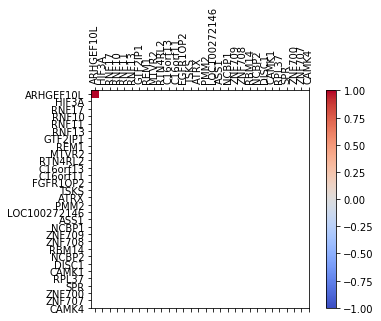

In [60]:
data = df4
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns[0:30]),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns[0:30])
ax.set_yticklabels(data.columns[0:30])
plt.show()

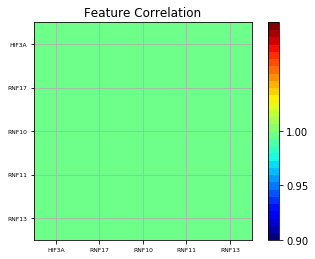

In [61]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    ax1.set_xticklabels(data.columns[0:30],fontsize=6)
    ax1.set_yticklabels(data.columns[0:30],fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data)

In [62]:
rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(20, 20))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

sample,Label
sample,
Label,1


In [ ]:
pd.scatter_matrix(data.iloc[1:20,1:10], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(data)

import matplotlib.pyplot as pl
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## 3) ML Classification

### Logistic Regression

In [47]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[339   2   0]
 [  2  99   1]
 [  0   0  87]]
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       341
        1.0       0.98      0.97      0.98       102
        2.0       0.99      1.00      0.99        87

avg / total       0.99      0.99      0.99       530



### Random Forest

In [48]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[341   0   0]
 [  9  92   1]
 [  1   0  86]]
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99       341
        1.0       1.00      0.90      0.95       102
        2.0       0.99      0.99      0.99        87

avg / total       0.98      0.98      0.98       530



### Support Vector Machine

In [49]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[339   2   0]
 [  2  99   1]
 [  0   0  87]]
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       341
        1.0       0.98      0.97      0.98       102
        2.0       0.99      1.00      0.99        87

avg / total       0.99      0.99      0.99       530



### Decision Trees

In [50]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))
# predictionstree = trainedtree.predict_proba(X_Test)
# print(predictionstree)

[[334   7   0]
 [  5  96   1]
 [  0   3  84]]
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98       341
        1.0       0.91      0.94      0.92       102
        2.0       0.99      0.97      0.98        87

avg / total       0.97      0.97      0.97       530



In [64]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import sklearn
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(trainedtree, out_file='tree3.dot',  
                filled=True, rounded=True,
                special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [68]:
from io import StringIO
from IPython.display import Image 
import sklearn
dot_data = StringIO()
sklearn.tree.export_graphviz(
    trainedtree,
    out_file=dot_data,
    feature_names=feature_column_names,
    class_names=['0', '1' , '2'],
    filled=True,
    rounded=True,
    special_characters=True,
    label='all',
    impurity=True,
    node_ids=True,
    proportion=True,
    rotate=False
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
with open("dtree.dot", 'w') as dotfile:
    sklearn.tree.export_graphviz(
        small_model, 
        out_file=dotfile, 
        feature_names=feature_column_names
    )

import subprocess
subprocess.call(['dot', '-Tsvg', 'dtree.dot', '-o', 'dtree.svg'])

### Linear Disciminant Analysis

In [52]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

C:\Apps\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[325  12   4]
 [  2  95   5]
 [  0   0  87]]
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97       341
        1.0       0.89      0.93      0.91       102
        2.0       0.91      1.00      0.95        87

avg / total       0.96      0.96      0.96       530



### Naive Bayes Classifier

In [53]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[326  13   2]
 [ 45  56   1]
 [ 24   8  55]]
             precision    recall  f1-score   support

        0.0       0.83      0.96      0.89       341
        1.0       0.73      0.55      0.63       102
        2.0       0.95      0.63      0.76        87

avg / total       0.83      0.82      0.81       530



### Plot taking just first 2 features

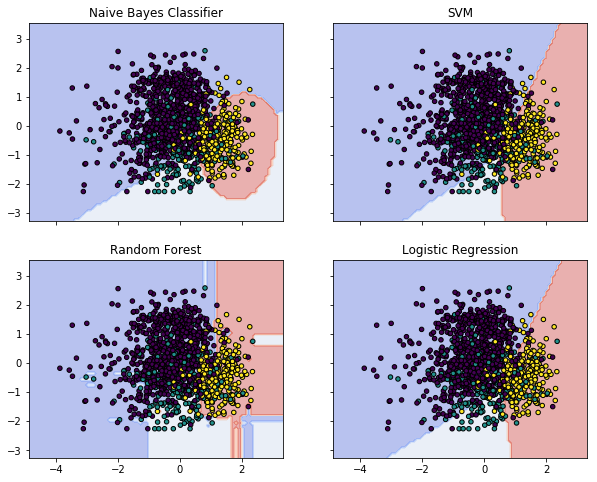

In [54]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# Plotting decision regions

reduced_data = X_Train[:, :2]

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)


x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### PCA Plot (taking features which maximize the variance)

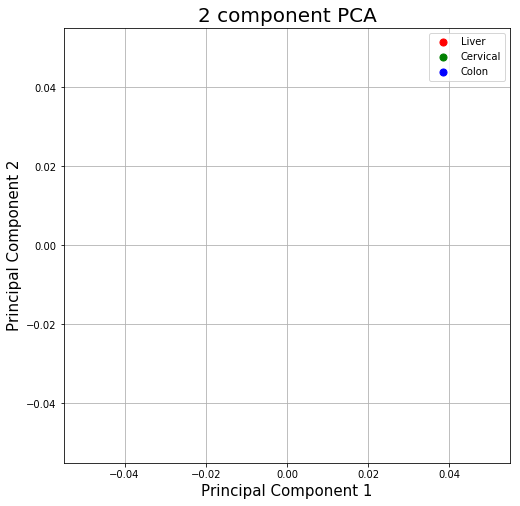

In [57]:
# Thanks to: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df4[['Label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Yes', 'No']
targets = [0, 1, 2]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Liver', 'Cervical','Colon'])
ax.grid()

### Evaluating PCA Data Performance

In [58]:
# df = pd.read_csv('Toddler Autism dataset July 2018.csv', na_values='?')
# df.dropna(inplace=True)
# df.drop(['Case_No', 'Who completed the test', 'Qchat-10-Score'], axis = 1, inplace = True)
# # df.head()

# columns = ['Ethnicity', 'Family_mem_with_ASD', 'Sex','Class/ASD Traits ', 'Jaundice']
# for col in columns:
#     df[col] = LabelEncoder().fit_transform(df[col])
# df.dtypes

# X = df.drop(['Class/ASD Traits '], axis = 1)
# Y = df['Class/ASD Traits ']

# X = StandardScaler().fit_transform(X) # Standardizing data

pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

# pca = PCA(n_components=2,svd_solver='full')
# X_reduced = pca.fit_transform(X_Train)
#X_reduced = TSNE(n_components=2).fit_transform(X_Train, Y_Train)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

# pca = PCA(n_components=2,svd_solver='full')
# X_test_reduced = pca.fit_transform(X_Test)
#X_test_reduced = TSNE(n_components=2).fit_transform(X_Test, Y_Test)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Naive Bayes
[[295  43   3]
 [ 40  61   1]
 [  3   0  84]]
             precision    recall  f1-score   support

        0.0       0.87      0.87      0.87       341
        1.0       0.59      0.60      0.59       102
        2.0       0.95      0.97      0.96        87

avg / total       0.83      0.83      0.83       530

SVM
[[331   0  10]
 [ 98   0   4]
 [  3   0  84]]
             precision    recall  f1-score   support

        0.0       0.77      0.97      0.86       341
        1.0       0.00      0.00      0.00       102
        2.0       0.86      0.97      0.91        87

avg / total       0.63      0.78      0.70       530

Random Forest
[[311  23   7]
 [ 35  64   3]
 [  3   1  83]]
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90       341
        1.0       0.73      0.63      0.67       102
        2.0       0.89      0.95      0.92        87

avg / total       0.86      0.86      0.86       530

Logistic Regression
[[320  1

C:\Apps\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plotting PCA data classification

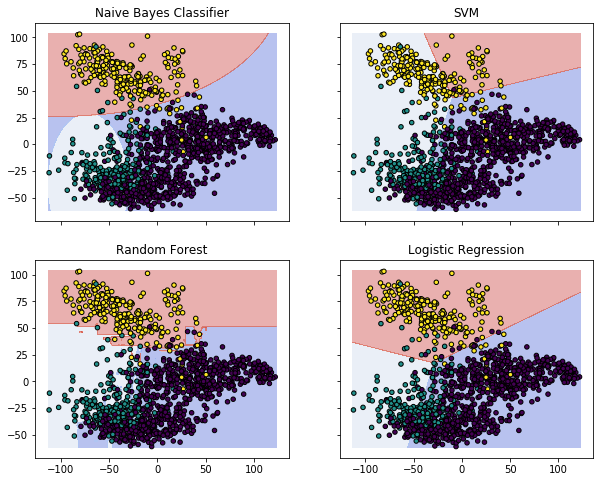

In [59]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# Plotting decision regions

reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)


x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()